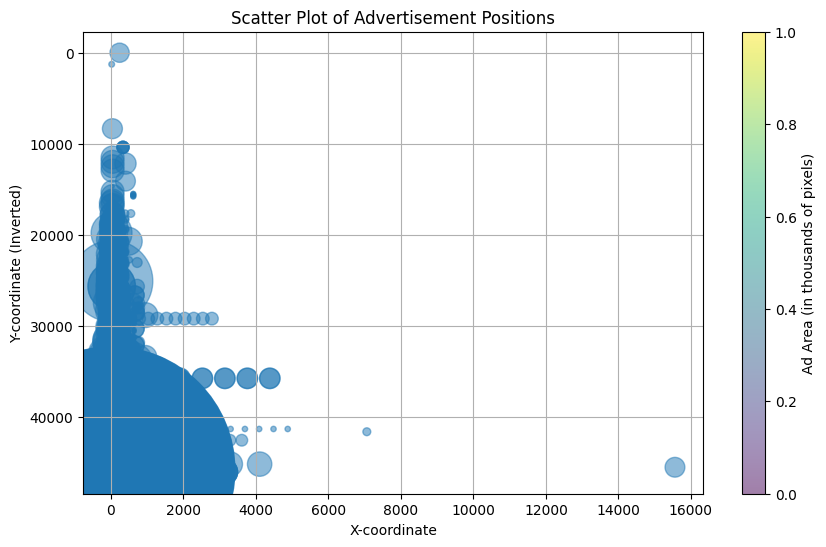

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Load the JSON data into a DataFrame
with open('/Users/kaleemullahqasim/Desktop/Prof Xiu Hai Tao/data/ad_positions.json') as file:
    data = json.load(file)

# Create a DataFrame
ads_df = pd.DataFrame(data)

# Calculate the area of each advertisement (width x height)
ads_df['area'] = ads_df['width'] * ads_df['height']

# Invert the y-axis to match the web layouts (Assuming a webpage height for normalization)
max_y_value = ads_df['y'].max()
ads_df['y_inverted'] = max_y_value - ads_df['y']

# Prepare the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(ads_df['x'], ads_df['y_inverted'], s=ads_df['area'] / 1000, alpha=0.5)
plt.title('Scatter Plot of Advertisement Positions')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate (Inverted)')
plt.colorbar(scatter, label='Ad Area (in thousands of pixels)')
plt.gca().invert_yaxis() # Invert y-axis for visualization purposes
plt.grid(True)

# Save the plot
plt.savefig('advertisement_scatter_plot_with_outliers.png')
plt.show()


## Outliers Detection and Removal

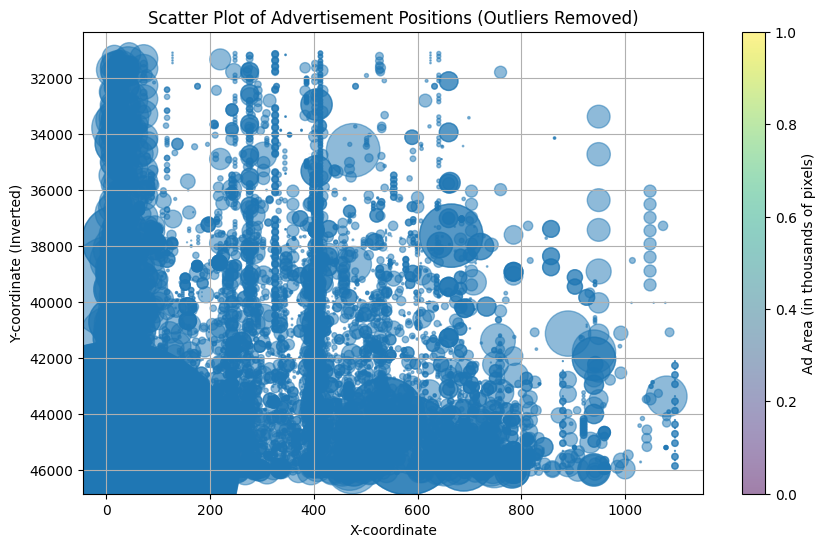

In [3]:
# Identify outliers using the interquartile range (IQR) method for both 'x' and 'y' coordinates
Q1_x = ads_df['x'].quantile(0.25)
Q3_x = ads_df['x'].quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = ads_df['y_inverted'].quantile(0.25)
Q3_y = ads_df['y_inverted'].quantile(0.75)
IQR_y = Q3_y - Q1_y

# Define bounds for what is considered an outlier
lower_bound_x = Q1_x - 1.5 * IQR_x
upper_bound_x = Q3_x + 1.5 * IQR_x

lower_bound_y = Q1_y - 1.5 * IQR_y
upper_bound_y = Q3_y + 1.5 * IQR_y

# Filter out the outliers
ads_df_filtered = ads_df[
    (ads_df['x'] >= lower_bound_x) & (ads_df['x'] <= upper_bound_x) &
    (ads_df['y_inverted'] >= lower_bound_y) & (ads_df['y_inverted'] <= upper_bound_y)
]

# Prepare the scatter plot without outliers
plt.figure(figsize=(10, 6))
scatter_filtered = plt.scatter(ads_df_filtered['x'], ads_df_filtered['y_inverted'], 
                               s=ads_df_filtered['area'] / 1000, alpha=0.5)
plt.title('Scatter Plot of Advertisement Positions (Outliers Removed)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate (Inverted)')
plt.colorbar(scatter_filtered, label='Ad Area (in thousands of pixels)')
plt.gca().invert_yaxis() # Invert y-axis for visualization purposes
plt.grid(True)

# Save the plot
plt.savefig('advertisement_scatter_plot_filtered_without_outliers.png')
plt.show()


## Zero-Based Inverted Index

/var/folders/12/_5rp17tj7219kynlpzrhsmjw0000gn/T/ipykernel_46563/74499967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ads_df_filtered['y_inverted_zero_based'] = ads_df_filtered['y_inverted'] - ads_df_filtered['y_inverted'].min()


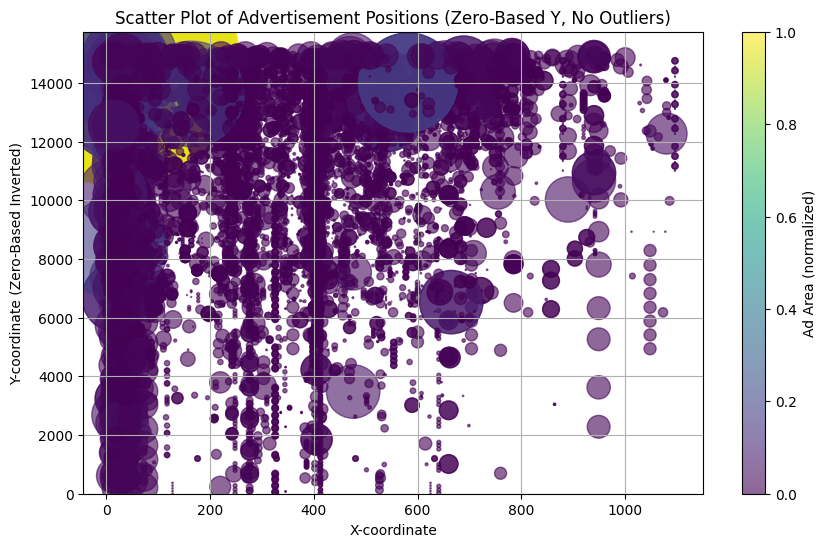

In [4]:
# Recalculate the inverted y-axis to start from 0
ads_df_filtered['y_inverted_zero_based'] = ads_df_filtered['y_inverted'] - ads_df_filtered['y_inverted'].min()

# Redefine the scatter plot colors to be clearer
colors = ads_df_filtered['area'] / ads_df_filtered['area'].max()

# Prepare the scatter plot without outliers and with clearer color distinctions
plt.figure(figsize=(10, 6))
scatter_filtered = plt.scatter(
    ads_df_filtered['x'],
    ads_df_filtered['y_inverted_zero_based'],
    s=ads_df_filtered['area'] / 1000,
    c=colors,
    cmap='viridis',
    alpha=0.6
)

plt.title('Scatter Plot of Advertisement Positions (Zero-Based Y, No Outliers)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate (Zero-Based Inverted)')
plt.colorbar(scatter_filtered, label='Ad Area (normalized)')
plt.grid(True)
plt.ylim(bottom=0)  # Ensure y-axis starts from 0

# Save the updated plot
plt.savefig('advertisement_scatter_plot_filtered_zero_based.png')
plt.show()


### Ad Area (Normalized & Inverted Index)


/var/folders/12/_5rp17tj7219kynlpzrhsmjw0000gn/T/ipykernel_46563/3813993822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ads_df_filtered['y_web'] = ads_df_filtered['y_inverted_zero_based'].max() - ads_df_filtered['y_inverted_zero_based']


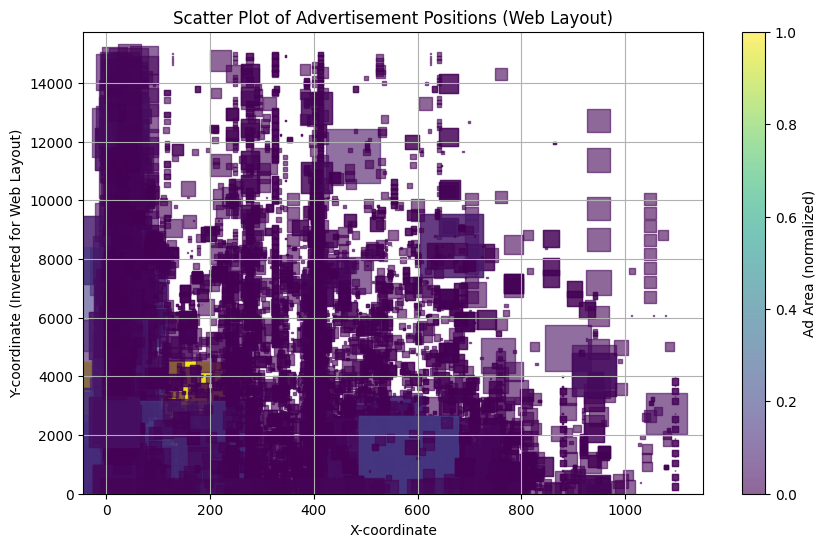

In [5]:
# Invert the y-axis values to match the web layouts (top-left origin)
# Since we have zero-based the values, we only need to invert without normalization
ads_df_filtered['y_web'] = ads_df_filtered['y_inverted_zero_based'].max() - ads_df_filtered['y_inverted_zero_based']

# Create the scatter plot with the inverted y-axis and rectangle markers
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    ads_df_filtered['x'], 
    ads_df_filtered['y_web'], 
    s=ads_df_filtered['area'] / 1000, 
    c=colors, 
    cmap='viridis', 
    alpha=0.6, 
    marker='s'  # Square marker to represent a rectangle
)

plt.title('Scatter Plot of Advertisement Positions (Web Layout)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate (Inverted for Web Layout)')
plt.colorbar(scatter, label='Ad Area (normalized)')
plt.grid(True)
plt.ylim(bottom=0)  # Ensure y-axis starts from the top of the plot, like a web page

# Save the updated plot
plt.savefig('advertisement_scatter_plot_web_layout.png')
plt.show()


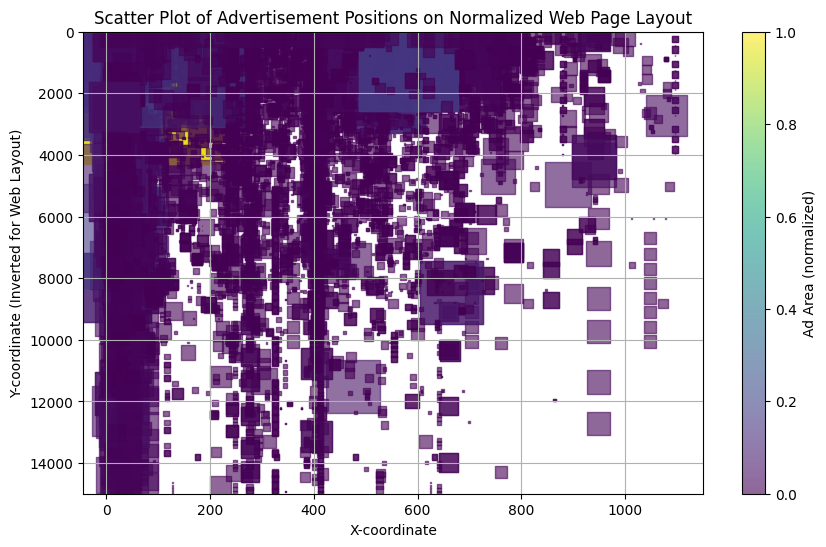

In [6]:
# Given the user's instruction, we need to adjust the plot according to the provided description:
# - The markers should be square-shaped (which we have done already).
# - The y-axis needs to start from 0 at the top (already done in the previous plot).
# - The points' color needs to be clearer.

# Let's redefine the color mapping to use the full spectrum of the colormap for better clarity
colors = (ads_df_filtered['area'] - ads_df_filtered['area'].min()) / \
         (ads_df_filtered['area'].max() - ads_df_filtered['area'].min())

# Create the scatter plot with the specified requirements
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    ads_df_filtered['x'], 
    ads_df_filtered['y_web'], 
    s=ads_df_filtered['area'] / 1000, 
    c=colors, 
    cmap='viridis', 
    alpha=0.6, 
    marker='s'  # Square marker to represent a rectangle
)

# Add colorbar for clarity
plt.colorbar(scatter, label='Ad Area (normalized)')

# Set plot title and labels
plt.title('Scatter Plot of Advertisement Positions on Normalized Web Page Layout')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate (Inverted for Web Layout)')

# Set y-limits to ensure the y-axis starts from 0 at the top
plt.ylim(ads_df_filtered['y_web'].max(), 0)

# Show grid for better readability
plt.grid(True)

# Save the updated plot with the correct file name as per user instruction
plt.savefig('figure_1_advertisement_distribution.png')
plt.show()


### Advertisement Positions with Different Tags
smaller point size for visibility

/var/folders/12/_5rp17tj7219kynlpzrhsmjw0000gn/T/ipykernel_46563/861054236.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ads_df_filtered['marker'] = ads_df_filtered['tag'].apply(lambda x: markers.get(x, 'x'))  # 'x' as default


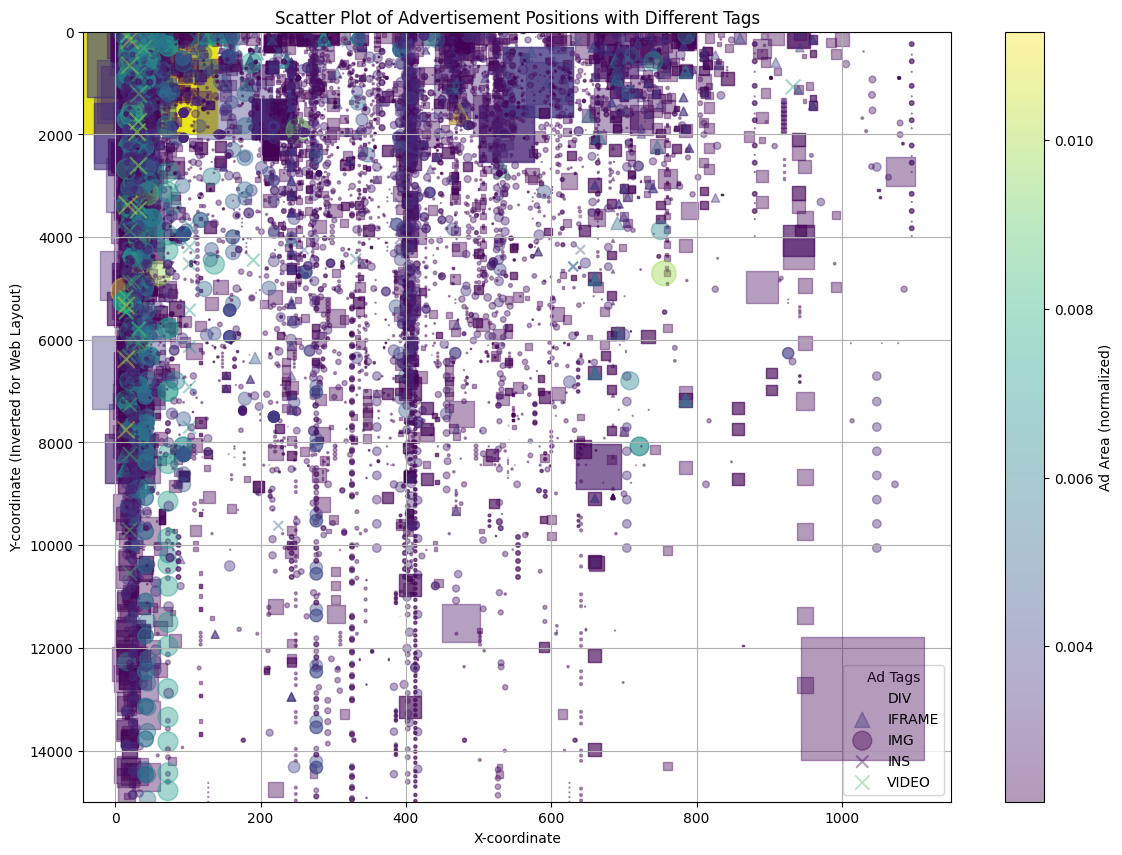

In [7]:
import numpy as np


markers = {
    'DIV': 's',  # square
    'IMG': 'o',  # circle
    'IFRAME': '^',  # triangle_up
    # Add more markers for different tags if necessary
}

# Assign a marker to each ad based on its tag
ads_df_filtered['marker'] = ads_df_filtered['tag'].apply(lambda x: markers.get(x, 'x'))  # 'x' as default

# Since the dataset is large, we'll reduce the point size and adjust the alpha for clarity
point_size = ads_df_filtered['area'] / 2000  # smaller point size for visibility
alpha = 0.4  # increased transparency for clarity

# Create the scatter plot with different shapes for different tags
plt.figure(figsize=(14, 10))

# We use a loop to plot each group to allow for legend handling
for tag, group in ads_df_filtered.groupby('tag'):
    plt.scatter(
        group['x'],
        group['y_web'],
        s=point_size[group.index],
        alpha=alpha,
        c=colors[group.index],
        cmap='viridis',
        marker=markers.get(tag, 'x'), # type: ignore
        label=str(tag)
    )

# Add colorbar for clarity
plt.colorbar(label='Ad Area (normalized)')

# Set plot title and labels
plt.title('Scatter Plot of Advertisement Positions with Different Tags')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate (Inverted for Web Layout)')
plt.legend(title='Ad Tags')

# Show grid for better readability
plt.grid(True)

# Set y-limits to ensure the y-axis starts from 0 at the top
plt.ylim(ads_df_filtered['y_web'].max(), 0)

# Save the updated plot with the correct file name as per user instruction
plt.savefig('figure_1_advertisement_distribution_by_tag.png')
plt.show()


### Less transparency for a clearer view of mid-sized ads

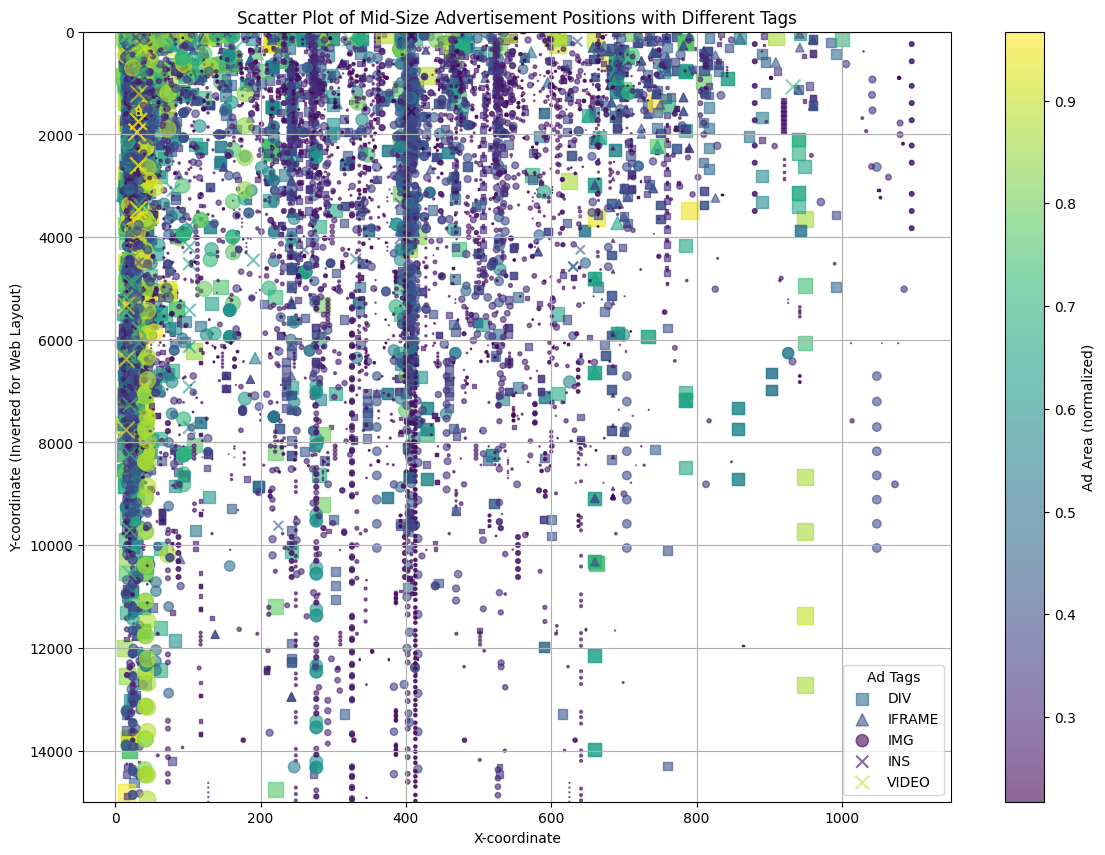

In [8]:


small_size_threshold = ads_df_filtered['area'].quantile(0.05)  # Ads smaller than the 5th percentile
large_size_threshold = ads_df_filtered['area'].quantile(0.95)  # Ads larger than the 95th percentile

# Filter out very small and very large ads
ads_df_sensible = ads_df_filtered[
    (ads_df_filtered['area'] > small_size_threshold) & 
    (ads_df_filtered['area'] < large_size_threshold)
]

# Recalculate colors and point sizes for the filtered data
colors_sensible = (ads_df_sensible['area'] - ads_df_sensible['area'].min()) / \
                  (ads_df_sensible['area'].max() - ads_df_sensible['area'].min())

point_size_sensible = ads_df_sensible['area'] / 2000  # Smaller point size for visibility
alpha_sensible = 0.6  # Less transparency for a clearer view of mid-sized ads

# Create the scatter plot with different shapes for different tags for the sensible-size ads
plt.figure(figsize=(14, 10))

# Loop to plot each group to allow for legend handling
for tag, group in ads_df_sensible.groupby('tag'):
    plt.scatter(
        group['x'],
        group['y_web'],
        s=point_size_sensible[group.index],
        alpha=alpha_sensible,
        c=colors_sensible[group.index],
        cmap='viridis',
        marker=markers.get(tag, 'x'), # type: ignore
        label=str(tag)
    )

# Add colorbar for clarity
plt.colorbar(label='Ad Area (normalized)')

# Set plot title and labels
plt.title('Scatter Plot of Mid-Size Advertisement Positions with Different Tags')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate (Inverted for Web Layout)')
plt.legend(title='Ad Tags')

# Show grid for better readability
plt.grid(True)

# Set y-limits to ensure the y-axis starts from 0 at the top
plt.ylim(ads_df_sensible['y_web'].max(), 0)

# Save the updated plot with the correct file name as per user instruction
plt.savefig('figure_1_advertisement_distribution_mid_size.png')
plt.show()


### different shapes for different tags for the reduced-size Ads

/var/folders/12/_5rp17tj7219kynlpzrhsmjw0000gn/T/ipykernel_46563/2844951718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ads_df_sensible['size_category'] = pd.qcut(ads_df_sensible['area'], q=10, labels=False)


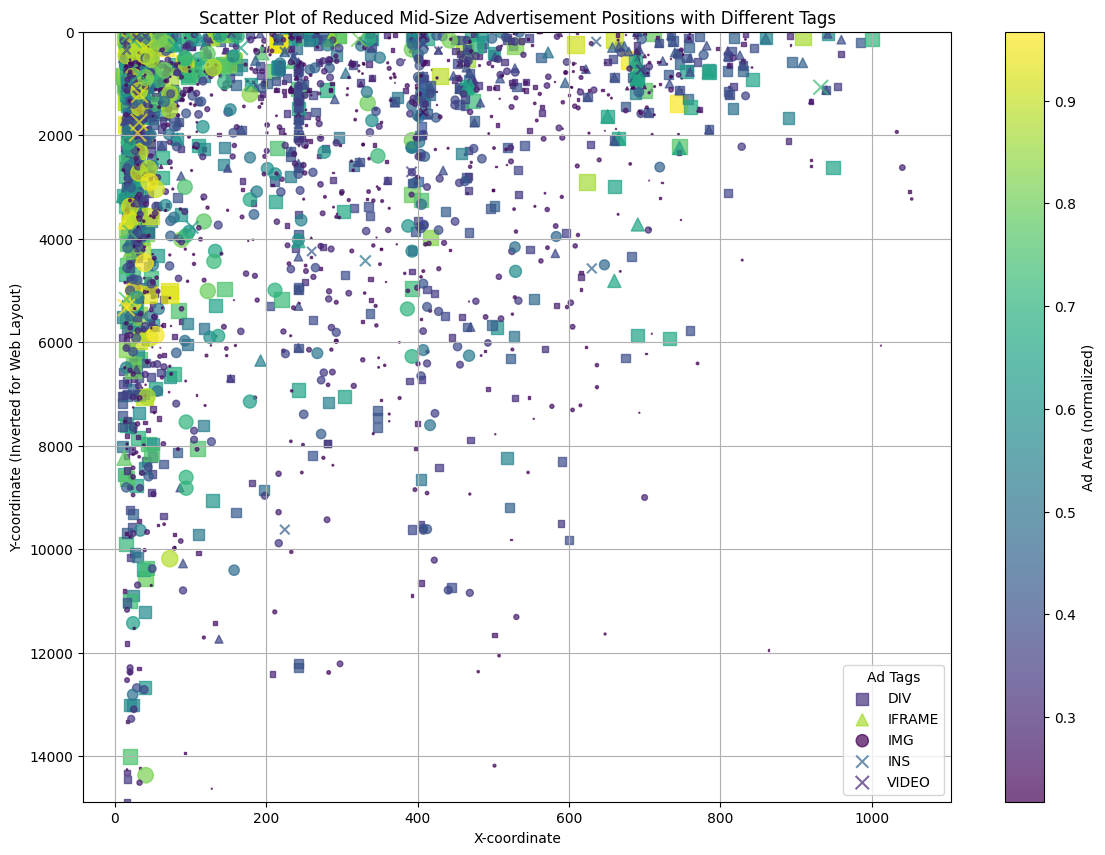

In [9]:

# Define a new column that categorizes ads into size categories based on quantiles
ads_df_sensible['size_category'] = pd.qcut(ads_df_sensible['area'], q=10, labels=False)

# Group by website, size category, and tag, then take the first entry from each group
ads_df_reduced = ads_df_sensible.groupby(['url', 'size_category', 'tag']).first().reset_index()

# Recalculate colors and point sizes for the reduced data
colors_reduced = (ads_df_reduced['area'] - ads_df_reduced['area'].min()) / \
                 (ads_df_reduced['area'].max() - ads_df_reduced['area'].min())

point_size_reduced = ads_df_reduced['area'] / 2000  # Smaller point size for visibility
alpha_reduced = 0.7  # Less transparency for a clearer view

# Create the scatter plot with different shapes for different tags for the reduced-size ads
plt.figure(figsize=(14, 10))

# Loop to plot each group to allow for legend handling
for tag, group in ads_df_reduced.groupby('tag'):
    plt.scatter(
        group['x'],
        group['y_web'],
        s=point_size_reduced[group.index],
        alpha=alpha_reduced,
        c=colors_reduced[group.index],
        cmap='viridis',
        marker=markers.get(tag, 'x'), # type: ignore
        label=str(tag)
    )

# Add colorbar for clarity
plt.colorbar(label='Ad Area (normalized)')

# Set plot title and labels
plt.title('Scatter Plot of Reduced Mid-Size Advertisement Positions with Different Tags')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate (Inverted for Web Layout)')
plt.legend(title='Ad Tags')

# Show grid for better readability
plt.grid(True)

# Set y-limits to ensure the y-axis starts from 0 at the top
plt.ylim(ads_df_reduced['y_web'].max(), 0)

# Save the updated plot with the correct file name as per user instruction
plt.savefig('figure_1_advertisement_distribution_reduced.png')
plt.show()


## Positional Heatmap of Advertisements

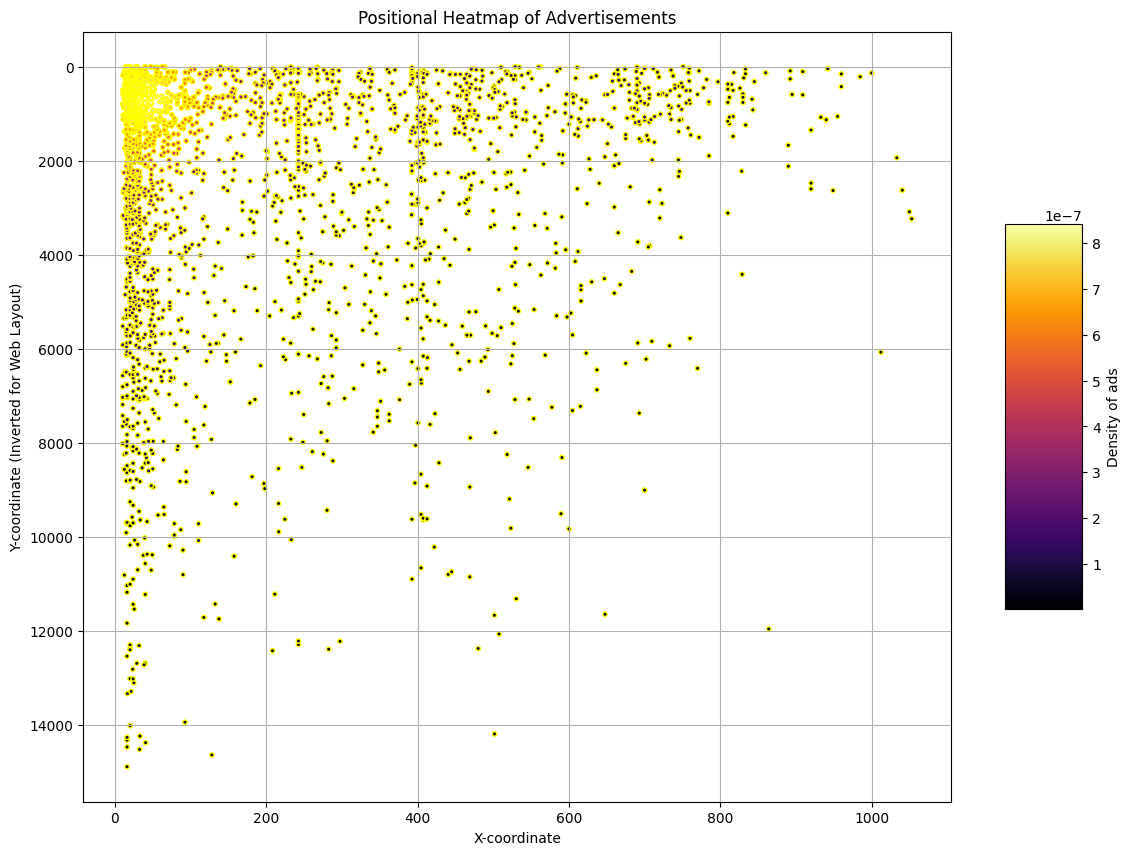

In [16]:
from scipy.stats import gaussian_kde
import numpy as np # type: ignore

# We will generate a positional heatmap using Gaussian KDE (Kernel Density Estimation)

# Set up the points for the KDE
x = ads_df_reduced['x']
y = ads_df_reduced['y_web']

# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the heatmap using scatter
scat = ax.scatter(x, y, c=z, s=10, edgecolor='yellow', cmap='inferno')

# Add a colorbar for the heatmap
cbar = fig.colorbar(scat, shrink=0.5, aspect=5)
cbar.set_label('Density of ads')

# Set the axis labels
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate (Inverted for Web Layout)')
ax.set_title('Positional Heatmap of Advertisements')

# Invert the y-axis to match the web page layout
ax.set_ylim(ax.get_ylim()[::-1]) # type: ignore

# Show the grid
ax.grid(True)

# Save the heatmap
plt.savefig('ads_positional_heatmap.png', bbox_inches='tight')
plt.savefig('only_heat_map.png')
plt.show()


KeyError: 'INS'

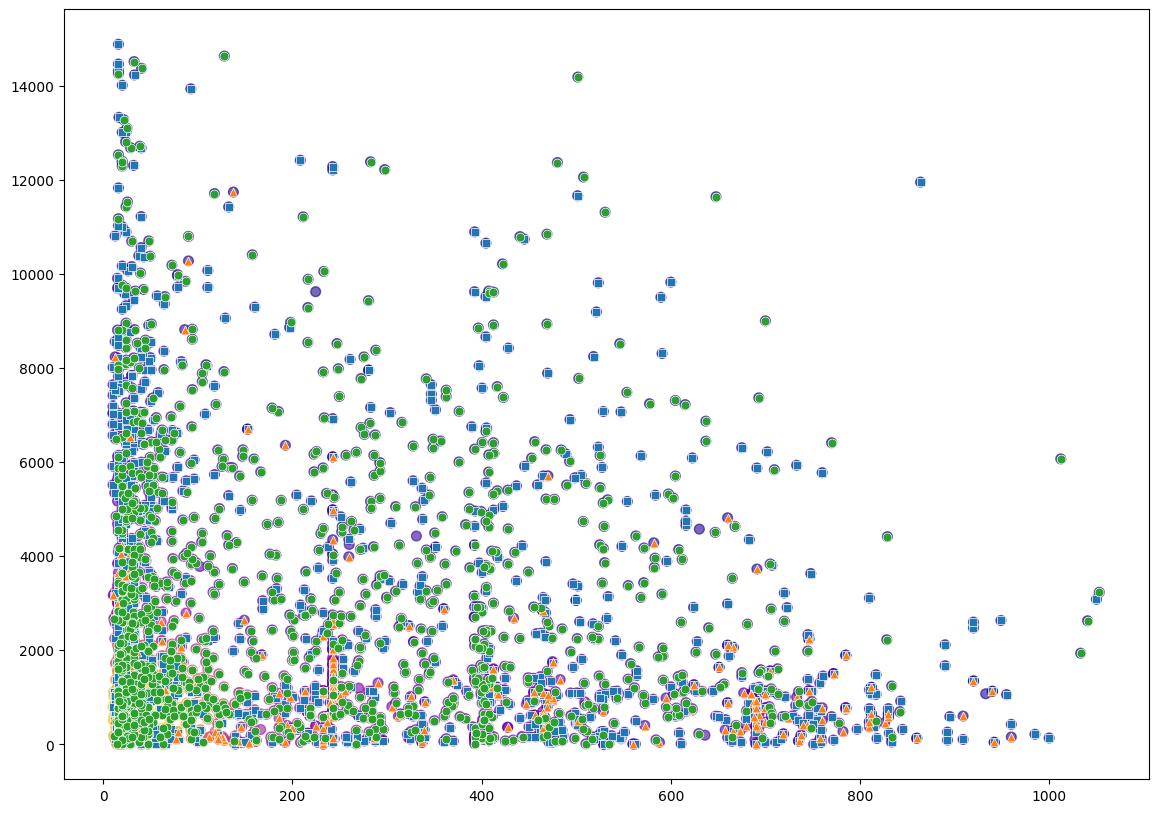

In [11]:
# To add different markers for each tag on the heatmap, we'll overlay the scatter plot with different markers onto the heatmap.

plt.figure(figsize=(14, 10))

# Create the heatmap base
scat = plt.scatter(x, y, c=z, s=50, cmap='plasma', alpha=0.6)

# Overlay the scatter plot with different markers for each tag
for tag, group in ads_df_reduced.groupby('tag'):
    plt.scatter(
        group['x'], 
        group['y_web'], 
        s=40,  # slightly smaller size for visibility against the heatmap
        marker=markers[tag],  # type: ignore
        label=tag,
        edgecolors='w',  # white edge color to distinguish markers
        linewidth=0.5
    )

# Invert the y-axis to match the web page layout
plt.ylim(plt.ylim()[::-1])

# Add a colorbar for the heatmap
plt.colorbar(scat, shrink=0.5, aspect=5).set_label('Density of ads')

# Add labels and title
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate (Inverted for Web Layout)')
plt.title('Positional Heatmap of Advertisements with Tag Markers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Ad Tags')

# Show grid
plt.grid(True)

# Save the plot
plt.savefig('ads_positional_heatmap_with_tags.png', bbox_inches='tight')

plt.show()


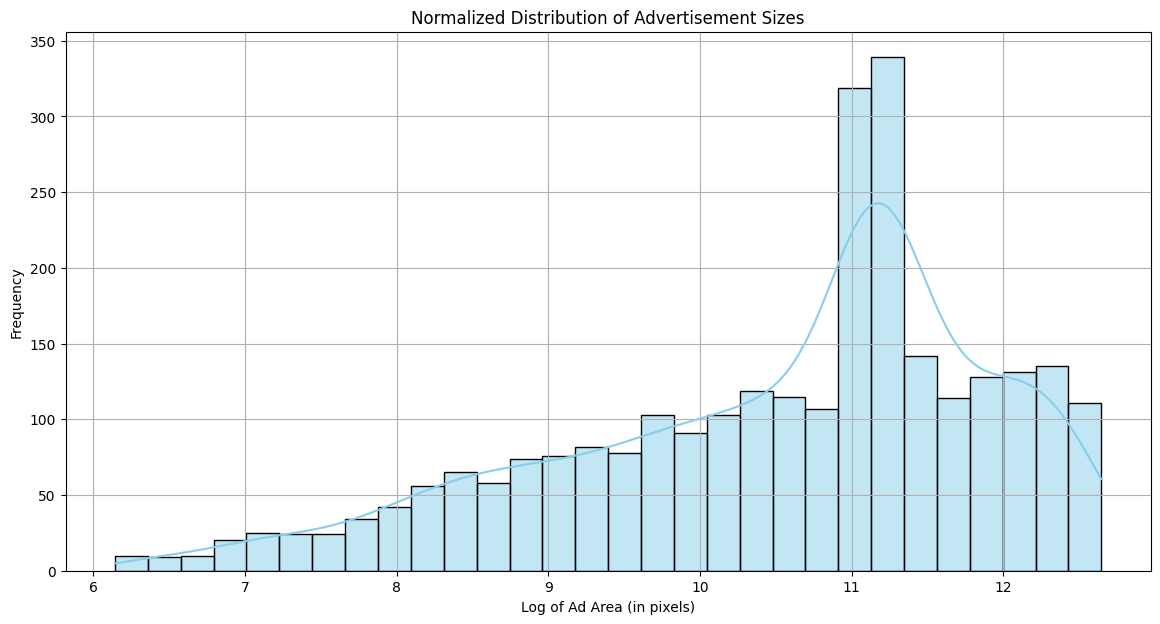

In [ ]:
import seaborn as sns
 
# Apply log transformation to ad sizes
ads_df_reduced['log_area'] = np.log1p(ads_df_reduced['area'])  # log1p to avoid log(0)

# Plot the normalized distribution of ad sizes
plt.figure(figsize=(14, 7))
sns.histplot(ads_df_reduced['log_area'], bins=30, kde=True, color='skyblue') # type: ignore
plt.title('Normalized Distribution of Advertisement Sizes')
plt.xlabel('Log of Ad Area (in pixels)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/var/folders/12/_5rp17tj7219kynlpzrhsmjw0000gn/T/ipykernel_31349/1658822774.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tags_proportion.values, y=tags_proportion.index, palette="viridis")


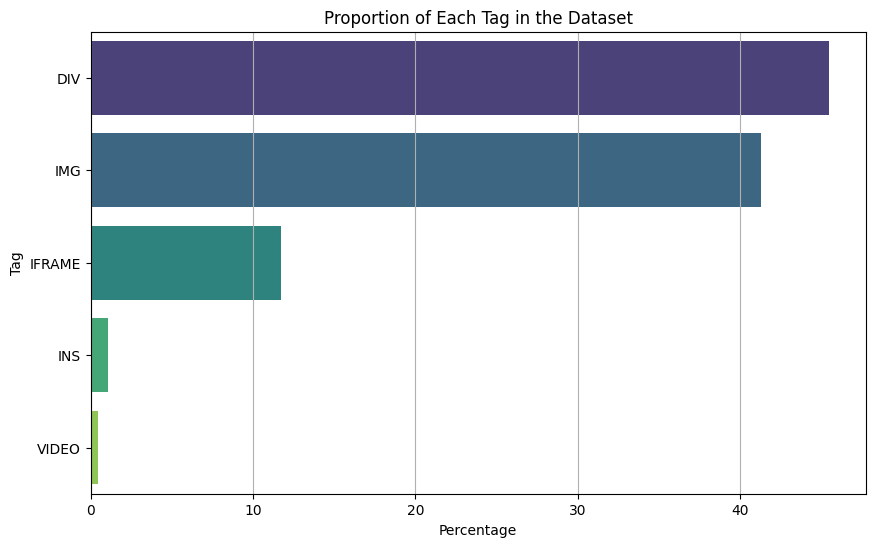

In [ ]:

# 1. Proportion of Each Tag in the Dataset
plt.figure(figsize=(10, 6))
tags_proportion = ads_df_reduced['tag'].value_counts(normalize=True) * 100
sns.barplot(x=tags_proportion.values, y=tags_proportion.index, palette="viridis")
plt.title('Proportion of Each Tag in the Dataset')
plt.xlabel('Percentage')
plt.ylabel('Tag')
plt.grid(True, axis='x')
plt.show()


/var/folders/12/_5rp17tj7219kynlpzrhsmjw0000gn/T/ipykernel_31349/940507321.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ads_per_tag.values, y=ads_per_tag.index, palette="muted")


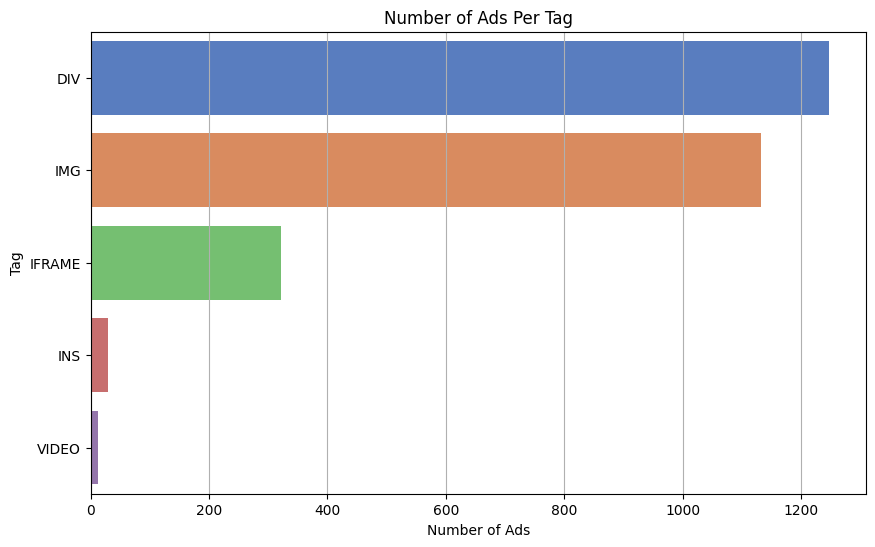

In [ ]:

# Count the number of ads per tag
ads_per_tag = ads_df_reduced['tag'].value_counts()

# Plot the number of ads per tag
plt.figure(figsize=(10, 6))
sns.barplot(x=ads_per_tag.values, y=ads_per_tag.index, palette="muted")
plt.title('Number of Ads Per Tag')
plt.xlabel('Number of Ads')
plt.ylabel('Tag')
plt.grid(True, axis='x')
plt.show()


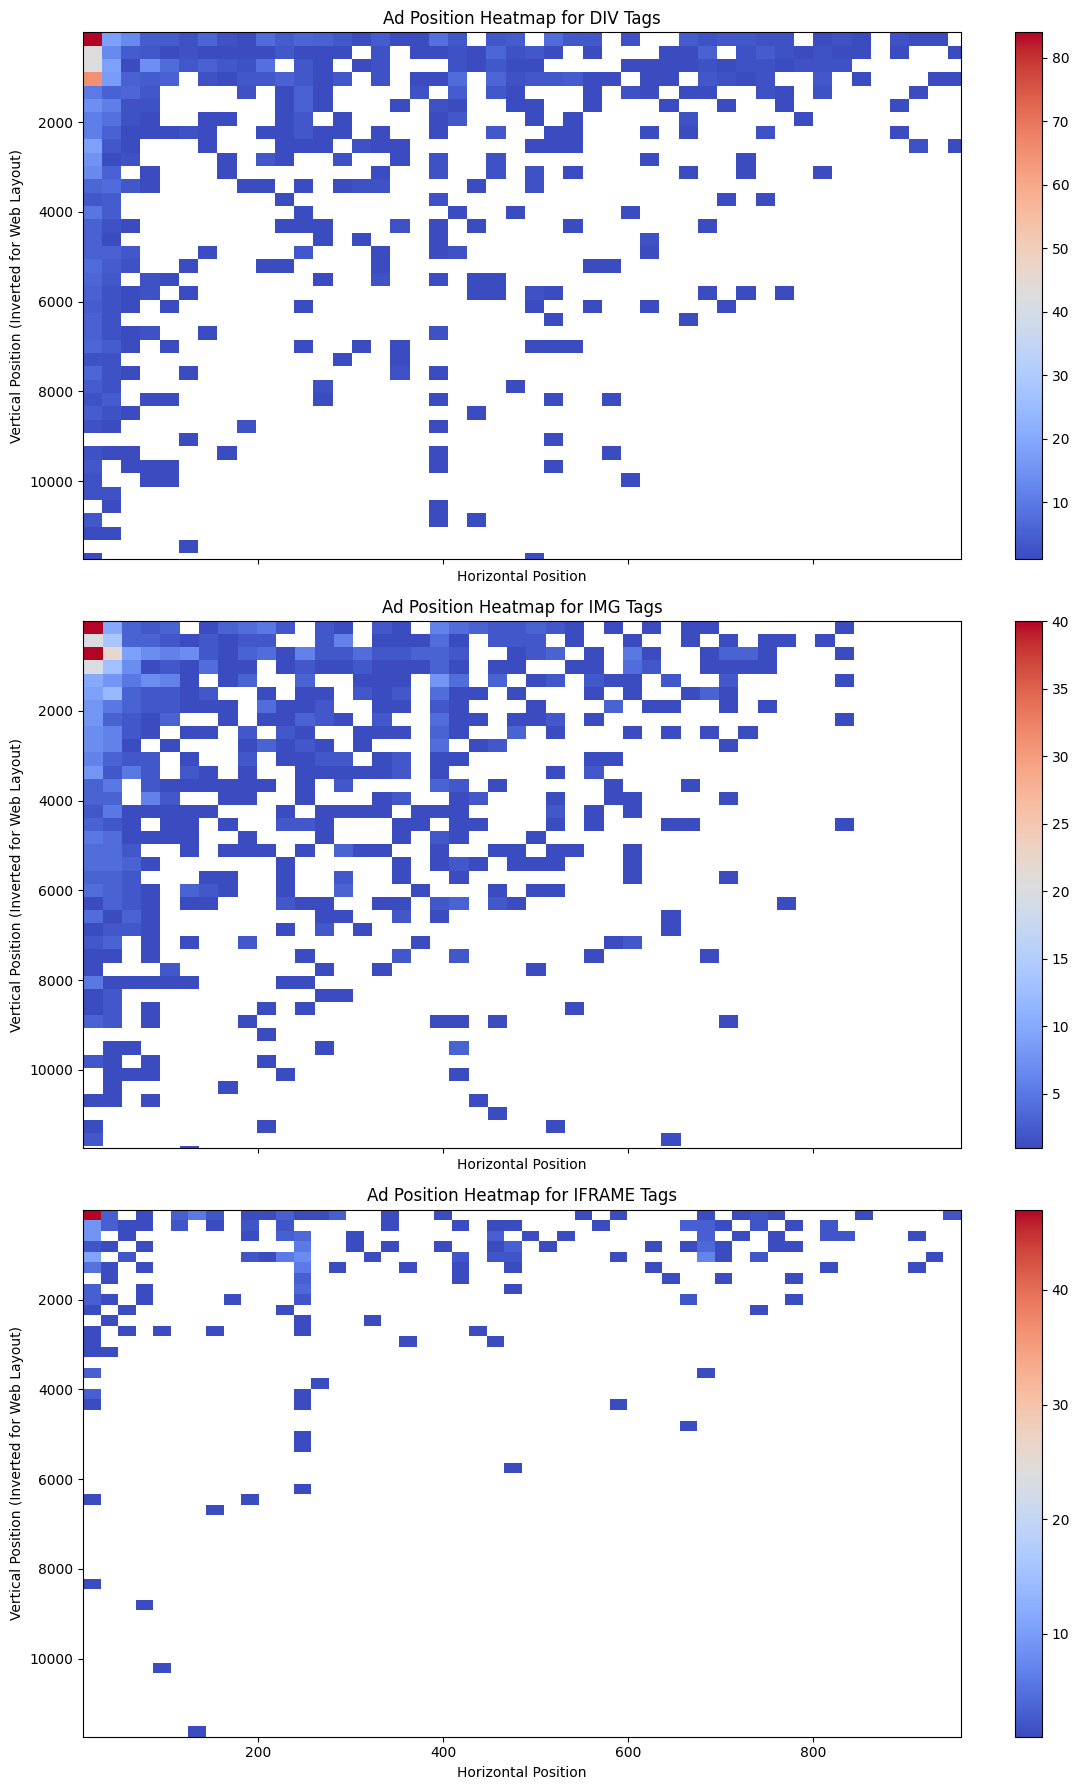

In [ ]:

top_tags = ads_df_reduced['tag'].value_counts().index[:3]
fig, axes = plt.subplots(len(top_tags), 1, figsize=(12, 18))

for ax, tag in zip(axes, top_tags):
    # Filter data for the current tag
    tag_data = ads_df_reduced[ads_df_reduced['tag'] == tag]
    # Use a 2D histogram to create the heatmap for positions
    h = ax.hist2d(tag_data['x'], tag_data['y_web'], bins=50, cmap='Blues', cmin=1)
    fig.colorbar(h[3], ax=ax)
    ax.set_title(f'Ad Position Heatmap for {tag} Tags')
    ax.set_xlabel('Horizontal Position')
    ax.set_ylabel('Vertical Position (Inverted for Web Layout)')
    ax.invert_yaxis()  # Invert y-axis to match web layout

# plt.tight_layout()
# plt.show()


# Let's improve the heatmaps by using a more distinct colormap and adjusting the bin sizes for better clarity.

fig, axes = plt.subplots(len(top_tags), 1, figsize=(12, 18), sharex=True, sharey=True)
for ax, tag in zip(axes, top_tags):
    # Filter data for the current tag
    tag_data = ads_df_reduced[ads_df_reduced['tag'] == tag]
    # Generate the heatmap with a clearer colormap and adjust bin sizes
    h = ax.hist2d(tag_data['x'], tag_data['y_web'], bins=[50, 50], cmap='coolwarm', cmin=1)
    fig.colorbar(h[3], ax=ax)
    ax.set_title(f'Ad Position Heatmap for {tag} Tags')
    ax.set_xlabel('Horizontal Position')
    ax.set_ylabel('Vertical Position (Inverted for Web Layout)')
    ax.invert_yaxis()  # Invert y-axis to match web layout

plt.tight_layout()
plt.show()

